<a href="https://colab.research.google.com/github/reginaldotiete/Dados_CDM/blob/main/Lista_CDM_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Lista Exercício 03 - Gráficos parte II
#Cheat Sheet - Python Matplotlib  
#Por: Yoshi
#Data: Jan/2020

!pip install windrose #colab

#Principais bibliotecas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from windrose import WindroseAxes

#%% Crie um array de temperatura media mensal

mes=np.arange(1,13,1);
tp = np.array([24.2, 24.6, 23.6, 21.1, 18.9, 16.7, 16.5, 16.9, 17.9, 19.6, 21.3, 23.0]);
chuva = np.array([162.7, 196.9, 173.0, 92.8, 96.9, 89.5, 99.5, 95.3, 134.2, 109.8, 130.2, 137.0]);
pressao = np.array([1010.5, 1011.1, 1012.4, 1014.5, 1015.7, 1017.0, 1018.1, 1017.3, 1016.7,	1014.6,	1012.1,	1010.9]);
umidade = np.array([81.0, 82.0, 82.0, 82.0, 83.0, 83.0, 84.0, 83.0, 83.0, 81.0, 80.0, 80.0]);

######################################################################################################################

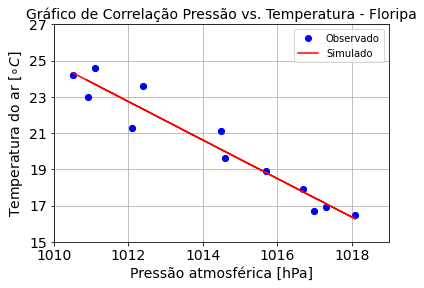

<Figure size 432x288 with 0 Axes>

In [ ]:


#%% Exemplo 04 - criar de correlação (scatter)
fig =plt.figure()

plt.scatter(pressao,tp)
x=pressao
y=tp

coef = np.polyfit(x,y,1)
f = np.poly1d(coef) 
plt.plot(x,y, 'bo', x, f(x), '-r')

plt.title('Gráfico de Correlação Pressão vs. Temperatura - Floripa',fontsize=14)
plt.xlabel('Pressão atmosférica [hPa]',fontsize=14)
plt.ylabel('Temperatura do ar [$\circ C$]',fontsize=14)
plt.xticks(np.arange(1010,1020, step=2),fontsize=14)
plt.yticks(np.arange(15,29, step=2),fontsize=14)
plt.legend(['Observado','Simulado']);
plt.ylim((15,27))
plt.xlim((1010,1019))
plt.grid()
plt.show()
plt.tight_layout()

######################################################################################################################

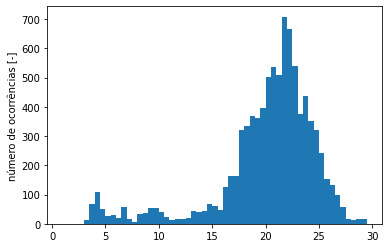

In [ ]:

#%% Exemplo 05 - criar de histograma (distribuição - gaussiana)

from numpy import genfromtxt

uri='https://raw.githubusercontent.com/sakagamiyoshiaki/CDM/master/IFSC-032010.txt'
# ano, mes, dia, hora, min, temp, umid, press, chuva, vel, dir

data = genfromtxt(uri, delimiter=',')

fig =plt.figure()

x=data[:,5] # temperatura
plt.hist(x, bins=np.arange(1,30,0.5));
plt.ylabel('número de ocorrências [-]');

######################################################################################################################

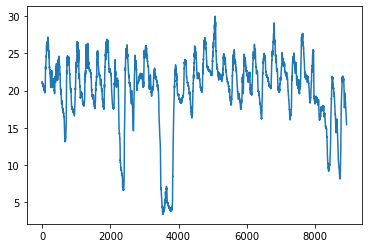

In [ ]:
plt.plot(x)

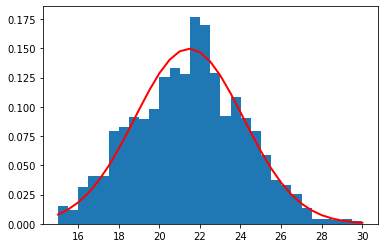

In [ ]:
#%% Examplo 06 - Gaussiana
fig =plt.figure()

f=data[:,5]>15
x1=data[f,5] # temperatura

count, bins, ignored = plt.hist(x1, 30, density=True)
mu=np.mean(x1);
sigma=np.std(x1);

YY=1/(sigma * np.sqrt(2*np.pi))*np.exp( - (bins - mu)**2/(2*sigma**2) )
plt.plot(bins,YY,linewidth=2, color='r')

######################################################################################################################

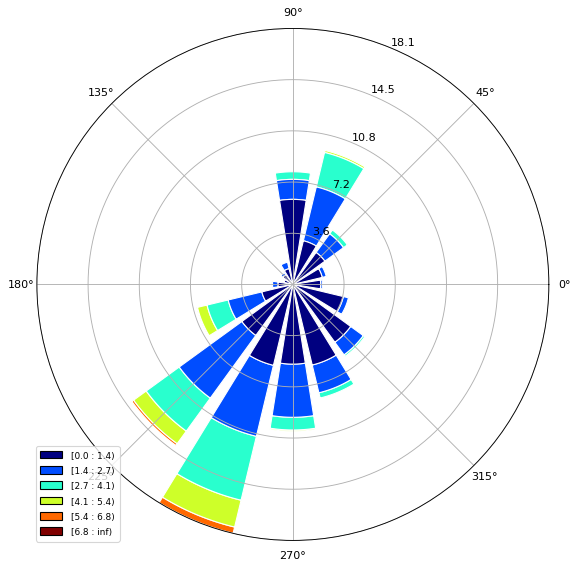

In [ ]:

#%% Exemplo 06 - criar rosa dos ventos (distribuição - polar)

ws=data[:,9];
wd=data[:,10];

ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()


######################################################################################################################